In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
from matplotlib.ticker import FuncFormatter
from scipy.stats import mode
import math

# Notebook analyses data obtained using the Steel Sound 5HV2

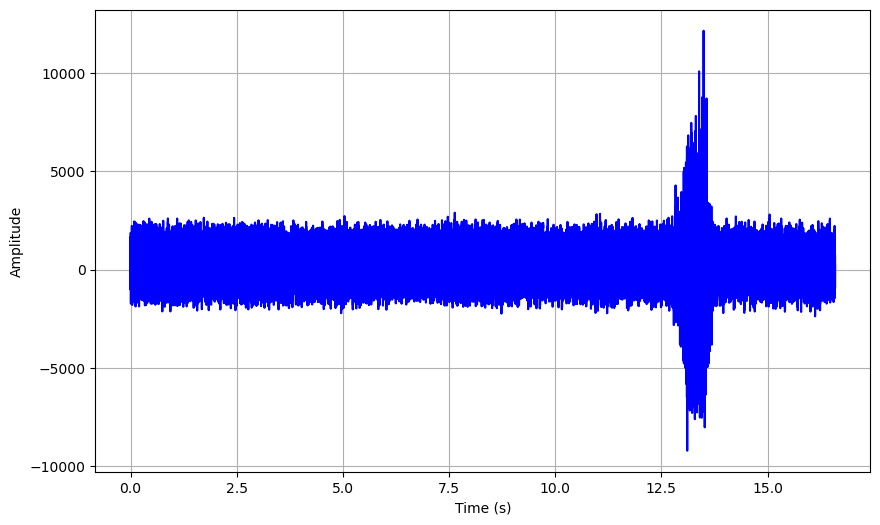

In [5]:
# Replace 'your_wav_file.wav' with the path to your WAV file
wav_file = 'Car40kmh.wav'

# Read the WAV file
sample_rate, audio_data = wavfile.read(wav_file)

# Calculate the time values for the x-axis
time = np.arange(0, len(audio_data)) / sample_rate

# Plot the voltage-time graph
plt.figure(figsize=(10, 6))
plt.plot(time, audio_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
#plt.title('Voltage-Time Plot')
plt.grid(True)
plt.savefig('SteelSoundTimeDomain.pdf', format = 'pdf')
plt.show()


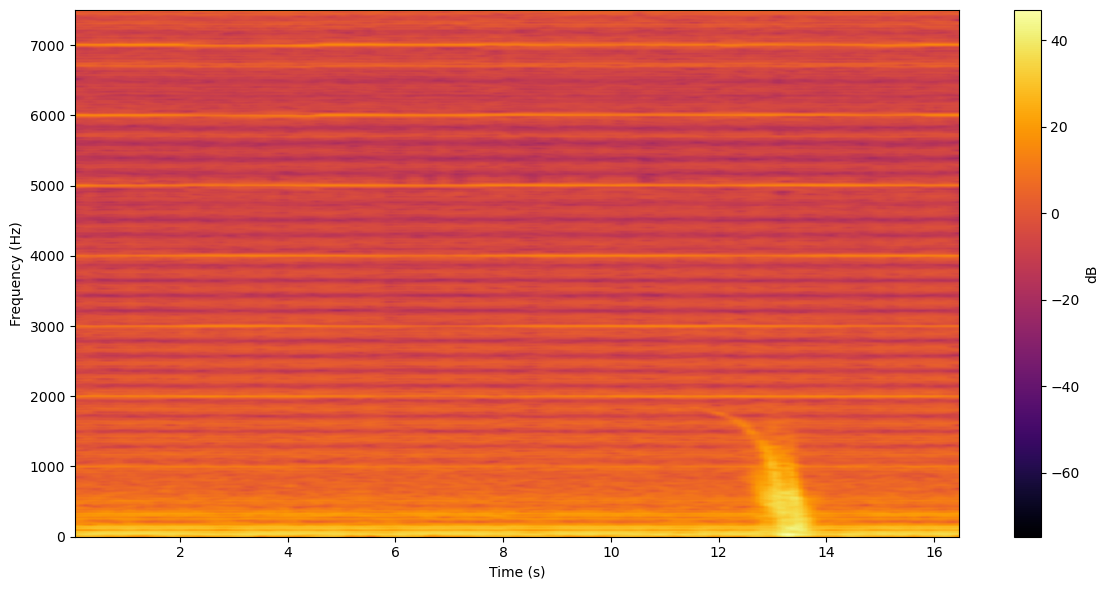

In [6]:
# Load the WAV file
filename = 'Car40kmh.wav'  # Replace with your WAV file's path
sample_rate, audio_data = wavfile.read(filename)

# Create a spectrogram
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate, nperseg=4096, noverlap=512)

# Apply Gaussian smoothing
from scipy.ndimage import gaussian_filter
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(1, 1))

# Plot the spectrogram with improvements
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_smoothed, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0,7500)
plt.colorbar(label='dB')
#plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.savefig('SteelSoundSpectrogram.pdf', format = 'pdf')
plt.show()